<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Image_Pre_Processing_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Lets start processing images of fruits to get the accuracy improved.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Make sure only TF verion > 2 is being used.

In [3]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Set path for test data available for different classes of fruits.

In [0]:
PATH = '/content/drive/My Drive/data/sample_data/dataset/dataset'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')

In [0]:
train_fresh_apples_dir = os.path.join(train_dir, 'freshapples')  # directory with our training fresh pictures
train_rotten_apples_dir = os.path.join(train_dir, 'rottenapples')  # directory with our training rotten pictures
validation_fresh_apples_dir = os.path.join(validation_dir, 'freshapples')  # directory with our validation fresh pictures
validation_rotten_apples_dir = os.path.join(validation_dir, 'rottenapples')  # directory with our validation rotten pictures


Lets get some of images from two classes of training and validation.

In [0]:
num_fresh_apples_tr = len(os.listdir(train_fresh_apples_dir))
num_rotten_apples_tr = len(os.listdir(train_rotten_apples_dir))

num_fresh_apples_val = len(os.listdir(validation_fresh_apples_dir))
num_rotten_apples_val = len(os.listdir(validation_rotten_apples_dir))

total_train = num_fresh_apples_tr + num_rotten_apples_tr
total_val = num_fresh_apples_val + num_rotten_apples_val


In [11]:
print('total training fresh apples images:', num_fresh_apples_tr)
print('total training rotten apples images:', num_rotten_apples_tr)

print('total validation fresh apples images:', num_fresh_apples_val)
print('total validation rotten apples images:', num_rotten_apples_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training fresh apples images: 1693
total training rotten apples images: 2342
total validation fresh apples images: 395
total validation rotten apples images: 601
--
Total training images: 4035
Total validation images: 996


Parameters for processing images with CNN.

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


Scale pixels between 0 to 1.

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

Lets browse directories for form clasess.

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 10901 images belonging to 6 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


Found 2698 images belonging to 6 classes.


Lets get some of images and plot them.

In [0]:
sample_training_images, _ = next(train_data_gen)


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


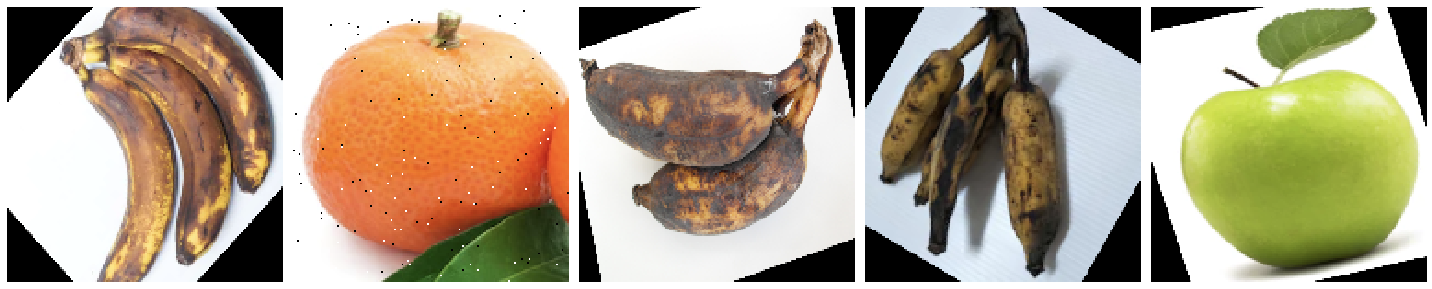

In [18]:
plotImages(sample_training_images[:5])


We know that there are six classes therfore hardcoded. Later once model is providing good accuracy it can be parameterised.

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])


We have more than 2 classes therefore opting loss fuction as categorical.

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

Lets fit data and get the best model.

In [26]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
31/31 [==============================] - 1497s 48s/step - loss: 1.6060 - accuracy: 0.2580 - val_loss: 1.2807 - val_accuracy: 0.4252
Epoch 2/15
31/31 [==============================] - 784s 25s/step - loss: 0.8967 - accuracy: 0.6573 - val_loss: 0.6463 - val_accuracy: 0.7589
Epoch 3/15
31/31 [==============================] - 951s 31s/step - loss: 0.6121 - accuracy: 0.7707 - val_loss: 0.4387 - val_accuracy: 0.8504
Epoch 4/15
31/31 [==============================] - 130s 4s/step - loss: 0.4379 - accuracy: 0.8468 - val_loss: 0.3122 - val_accuracy: 0.8850
Epoch 5/15
31/31 [==============================] - 126s 4s/step - loss: 0.4002 - accuracy: 0.8596 - val_loss: 0.2902 - val_accuracy: 0.8929
Epoch 6/15
31/31 [==============================] - 129s 4s/step - loss: 0.3073 - accuracy: 0.8947 - val_loss: 0.2391 - val_accuracy: 0.9096
Epoch 7/15
31/31 [==============================] - 127s 4s/step - loss: 0.2548 - accuracy: 0.9101 - val_loss: 0.2205 - val_accuracy: 0.9208
Epoch 8/1

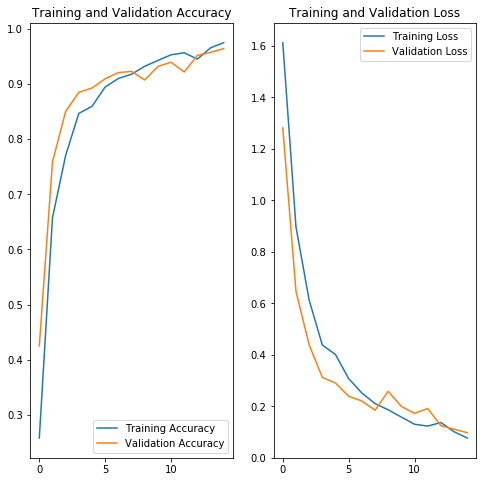

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)


In [29]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 10901 images belonging to 6 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


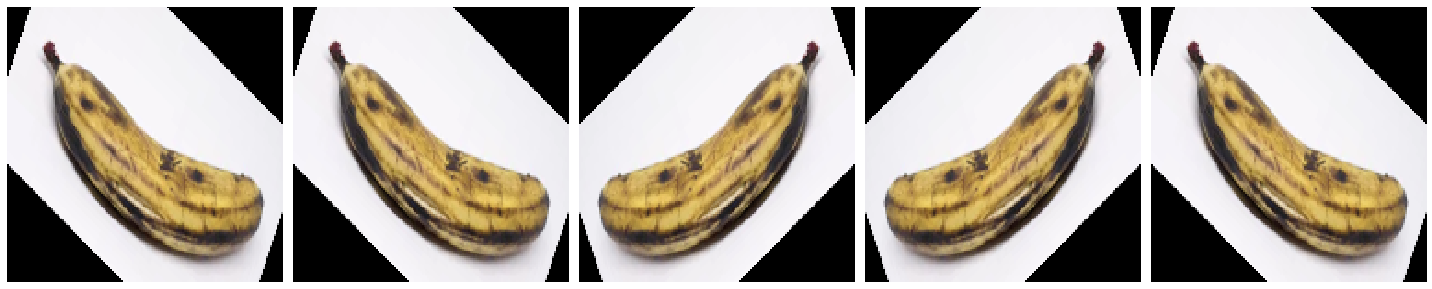

In [31]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [33]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 10901 images belonging to 6 classes.


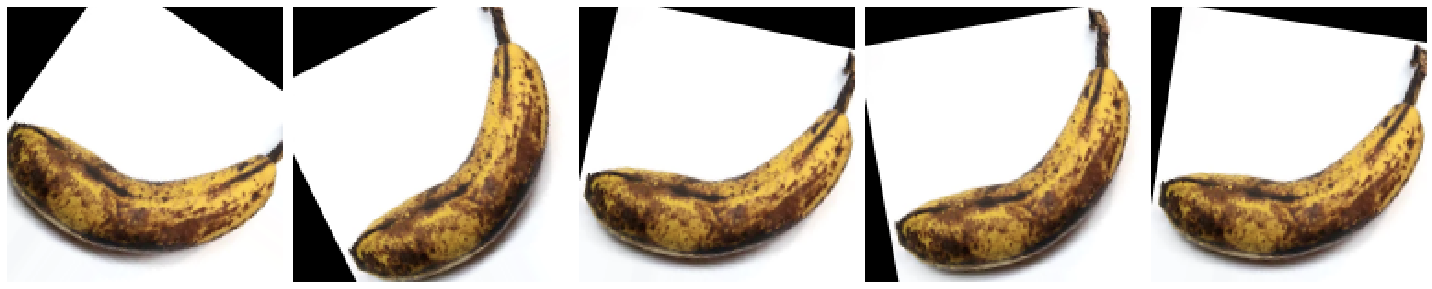

In [34]:
plotImages(augmented_images)


In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 


In [36]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 10901 images belonging to 6 classes.


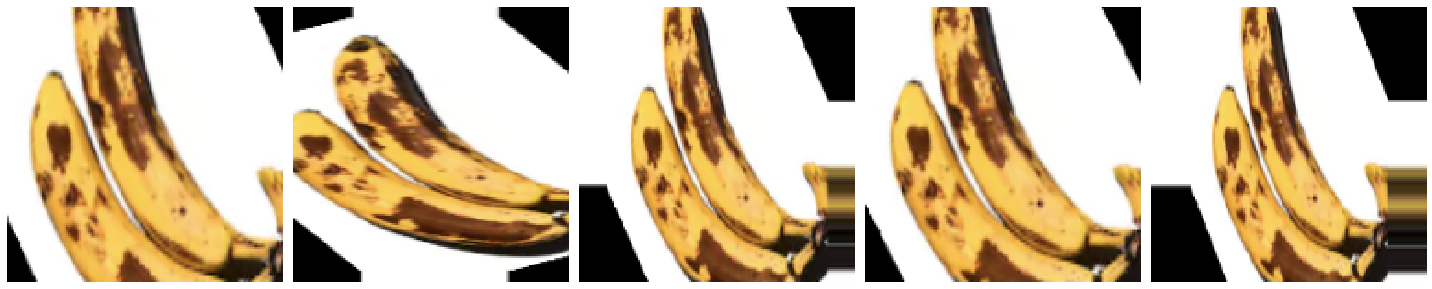

In [37]:
plotImages(augmented_images)


In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [39]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')


Found 10901 images belonging to 6 classes.


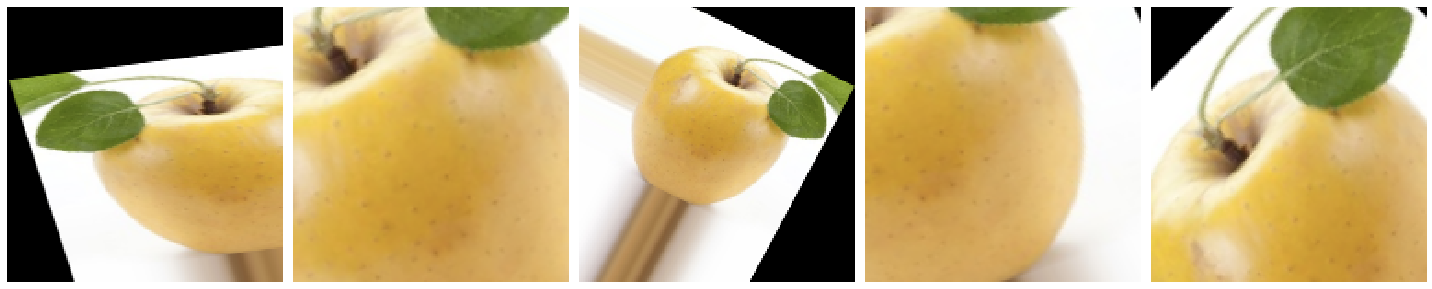

In [40]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [43]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')


Found 2698 images belonging to 6 classes.


In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='sigmoid')
])


In [46]:
model_new.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_new.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)       

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
29/31 [===========================>..] - ETA: 9s - loss: 1.8232 - accuracy: 0.2813 

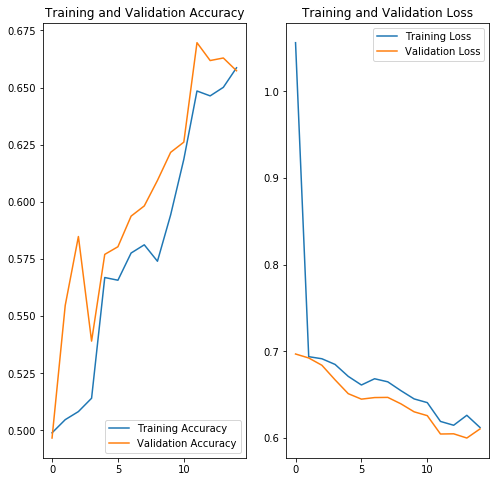

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
